# Customer Retention for SyriaTel

Here at SyriaTel, a telecommunications company, we're committed to making our consumers happy and keeping them part of the family. We will look at our data with different models to predict which customers are more likely to cancel their service with our company in order to better prevent patron loss. 

We will start with loading the necessary libraries and looking into our dataset.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import plot_tree
from sklearn import tree
from six import StringIO
from IPython.display import Image
%matplotlib inline

In [2]:
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [3]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#dropping columns that won't be used
data.drop(columns=['state', 'account length', 'area code', 'phone number', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge'], inplace=True)

In [5]:
#renaming columns
data = data.rename(columns = {'international plan': 'International Plan', 'voice mail plan': 'Voicemail Plan', 'number vmail messages': 'Number of Voicemail Messages', 'total day minutes': 'Total Day Minutes', 'total day calls': 'Total Day Calls', 'total eve minutes': "Total Evening Minutes", 'total eve calls': 'Total Evening Calls', 'total night minutes': 'Total Night Minutes', 'total night calls': 'Total Night Calls', 'total intl minutes': 'Total International Minutes', 'total intl calls': 'Total International Calls', 'customer service calls': 'Customer Service Calls', 'churn': 'Churn'}, inplace = False)

In [6]:
#change international plan, voicemail plan and churn to numerical values
#0 = no/false, 1 = yes/true
#also making sure these values are numbers and not strings

data['International Plan'] = data['International Plan'].replace('no', '0')
data['International Plan'] = data['International Plan'].replace('yes', '1')
data['Voicemail Plan'] = data['International Plan'].replace('no', '0')
data['Voicemail Plan'] = data['International Plan'].replace('yes', '1')
data['Churn'] = data['International Plan'].replace('False', '0')
data['Churn'] = data['International Plan'].replace('True', '1')

data['International Plan'] = data['International Plan'].astype(int)
data['Voicemail Plan'] = data['International Plan'].astype(int)
data['Churn'] = data['International Plan'].astype(int)


In [7]:
#defining x and y
y = data[['Churn']].values.ravel()
#x = data[['International Plan', 'Voicemail Plan', 'Number of Voicemail Messages', 'Total Day Minutes', 'Total Day Calls', 'Total Evening Minutes', 'Total Evening Calls', 'Total Night Minutes', 'Total Night Calls', 'Total International Minutes', 'Total International Calls', 'Customer Service Calls']]
x = data.drop('Churn', axis=1)

In [8]:
#defining x train, y train, x test and y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [9]:
#using a defined function for modeling to streamline the process
def run_model(model, x_train, y_train, x_test, y_test):
    
    #fitting
    model.fit(x_train, y_train)
    
    #predictions
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    
    print('Classification Report: Train Set \n')
    print(classification_report(y_train, y_hat_train))
    print('Classification Report: Test Set \n')
    print(classification_report(y_test, y_hat_test))
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18,6))
    
    plot_confusion_matrix(model, x_train, y_train, ax=ax0)
    plot_confusion_matrix(model, x_test, y_test, ax=ax1)
    
    ax0.title.set_text('Train Confusion Matrix')
    ax1.title.set_text('Test Confusion Matrix')
    
    return model

In [10]:
#looking and checking for null or missing data
data.describe()

,International Plan,Voicemail Plan,Number of Voicemail Messages,Total Day Minutes,Total Day Calls,Total Evening Minutes,Total Evening Calls,Total Night Minutes,Total Night Calls,Total International Minutes,Total International Calls,Customer Service Calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.096910,0.096910,8.099010,179.775098,100.435644,200.980348,100.114311,200.872037,100.107711,10.237294,4.479448,1.562856,0.096910
std,0.295879,0.295879,13.688365,54.467389,20.069084,50.713844,19.922625,50.573847,19.568609,2.791840,2.461214,1.315491,0.295879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,143.700000,87.000000,166.600000,87.000000,167.000000,87.000000,8.500000,3.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,179.400000,101.000000,201.400000,100.000000,201.200000,100.000000,10.300000,4.000000,1.000000,0.000000
75%,0.000000,0.000000,20.000000,216.400000,114.000000,235.300000,114.000000,235.300000,113.000000,12.100000,6.000000,2.000000,0.000000
max,1.000000,1.000000,51.000000,350.800000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   International Plan            3333 non-null   int32  
 1   Voicemail Plan                3333 non-null   int32  
 2   Number of Voicemail Messages  3333 non-null   int64  
 3   Total Day Minutes             3333 non-null   float64
 4   Total Day Calls               3333 non-null   int64  
 5   Total Evening Minutes         3333 non-null   float64
 6   Total Evening Calls           3333 non-null   int64  
 7   Total Night Minutes           3333 non-null   float64
 8   Total Night Calls             3333 non-null   int64  
 9   Total International Minutes   3333 non-null   float64
 10  Total International Calls     3333 non-null   int64  
 11  Customer Service Calls        3333 non-null   int64  
 12  Churn                         3333 non-null   int32  
dtypes: 

0    3010
1     323
Name: Churn, dtype: int64


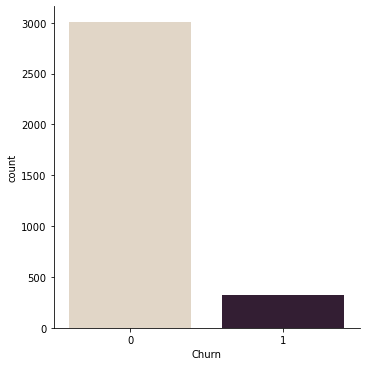

In [12]:
#looking at retention/churn values
print(data["Churn"].value_counts())
sns.catplot(x="Churn", kind="count", palette="ch:.25", data=data)

Looking here at the graph above we can see that with customer churn, or otherwise known as customer retention, 90.3% (or 3,010 people) of customers continued to do business with SyriaTel. While that is a relatively high rate, there was still the 9.7% (or 323 people) that did not. Below we will look at some models to better understand the features in our data and how they may play a pivotal role in client loyalty.

# Decision Tree Modeling

In [13]:
#using Decision Trees as first model
dtc = DecisionTreeClassifier()

Classification Report: Train Set 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2402
           1       1.00      1.00      1.00       264

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666

Classification Report: Test Set 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       608
           1       1.00      1.00      1.00        59

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667



DecisionTreeClassifier()

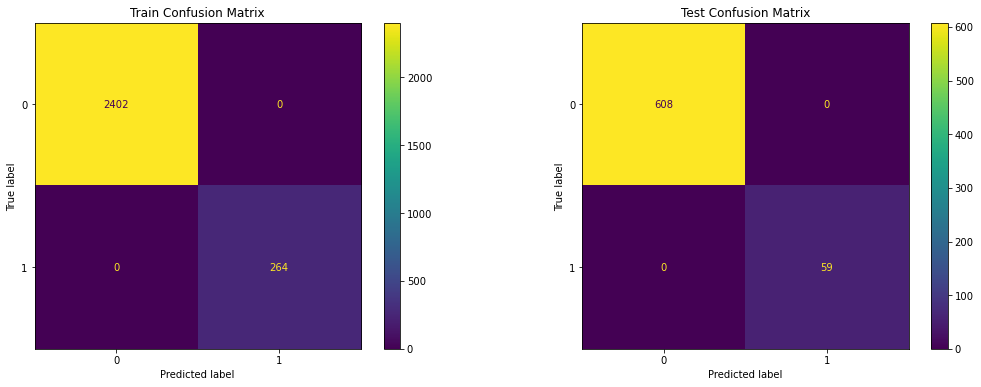

In [14]:
run_model(dtc, x_train, y_train, x_test, y_test)

[Text(279.0, 203.85000000000002, 'X[0] <= 0.5\ngini = 0.178\nsamples = 2666\nvalue = [2402, 264]'),
 Text(139.5, 67.94999999999999, 'gini = 0.0\nsamples = 2402\nvalue = [2402, 0]'),
 Text(418.5, 67.94999999999999, 'gini = 0.0\nsamples = 264\nvalue = [0, 264]')]

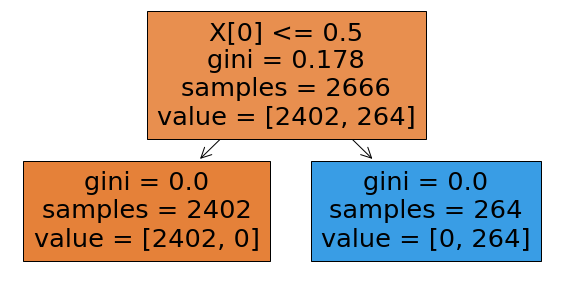

In [15]:
#plot the decision tree
plt.figure(figsize=(10, 5))
tree.plot_tree(dtc, filled=True)

In [16]:
#feature importances 
dtc.feature_importances_
df = pd.DataFrame({'Feature Names':x.columns, 'Importance':dtc.feature_importances_})
df.sort_values('Importance', ascending=False)

,Feature Names,Importance
0,International Plan,1.0
1,Voicemail Plan,0.0
2,Number of Voicemail Messages,0.0
3,Total Day Minutes,0.0
4,Total Day Calls,0.0
5,Total Evening Minutes,0.0
6,Total Evening Calls,0.0
7,Total Night Minutes,0.0
8,Total Night Calls,0.0
9,Total International Minutes,0.0


For the Decision Tree Model, we can see that there is a nice attribute of it where we can check on feature importances. With the upwards graph, we can see that customers who had the Voicemail Plan had a high impact on customer Churn compared to the other features, so therefore we will keep this in mind when we discuss our recommendations. 

Over all the Decision Tree model had very good numbers across accuracy,  precision, recall and F1 scores. This held true even with testing variations to the default model, but due to Decision Trees having the tendency to overgeneralize the data and potentially leading to over fitting, this will most likely not be the final model choice.

# Random Forest Modeling

In [17]:
#using Random Forest as second model
ranfor = RandomForestClassifier()

Classification Report: Train Set 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2402
           1       1.00      1.00      1.00       264

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666

Classification Report: Test Set 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       608
           1       1.00      1.00      1.00        59

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667



RandomForestClassifier()

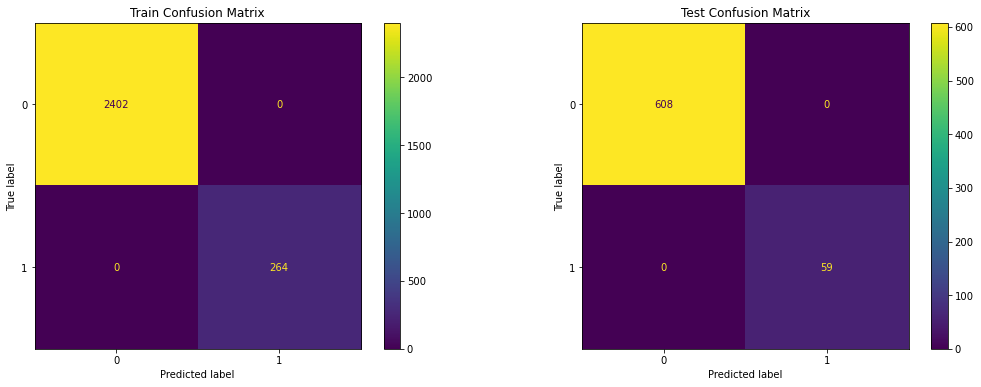

In [18]:
run_model(ranfor, x_train, y_train, x_test, y_test)

In [19]:
#feature importances 
ranfor.feature_importances_
df = pd.DataFrame({'Feature Names':x.columns, 'Importance':ranfor.feature_importances_})
df.sort_values('Importance', ascending=False)

,Feature Names,Importance
0,International Plan,0.503334
1,Voicemail Plan,0.470974
3,Total Day Minutes,0.004971
9,Total International Minutes,0.003749
7,Total Night Minutes,0.003599
5,Total Evening Minutes,0.003076
4,Total Day Calls,0.002476
10,Total International Calls,0.001708
8,Total Night Calls,0.001667
6,Total Evening Calls,0.001585


As with the Decision Tree Model, the Random Forest Model also deals with feature importances and shows that once again that the VoiceMail Plan is noted having great influence on customer Churn. The difference between the two models showing that the International Plan was slightly more relevant than VoiceMail Plans, but the latter still highly rated with importance. 

In addition, just like the Decision Tree Model, the Random Forest Model had high accuracy, precision, recall and F1 scores. These scores remained up to par, even after changing the default settings. Regardless of the number of estimators, the criterion and even max depth, the Random Forest Model performed very well.

With all of this in mind, there is the fact that with Random Forest Models, the downside is that if they have a large number of trees, this can slow the prediction process. This may not be an issue just now, but we will keep this in mind when choosing what the final model for this dataset will be.

# Logistic Regression Modeling

In [20]:
#using Logistic Regression as third model
logreg = LogisticRegression(max_iter=500)

Classification Report: Train Set 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2402
           1       1.00      1.00      1.00       264

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666

Classification Report: Test Set 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       608
           1       1.00      1.00      1.00        59

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667



LogisticRegression(max_iter=500)

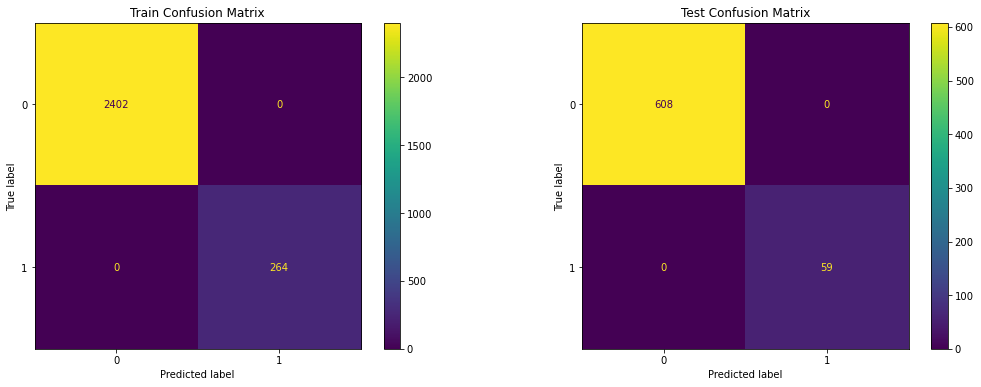

In [21]:
run_model(logreg, x_train, y_train, x_test, y_test)

The results of our Logistic Regression model are the same as the previous ones in terms of having good scores across the confusion matrices, which is great for our dataset but makes it that much tougher choosing one for our final model. Logistic Regression models are great since they are easy to implement and edit information to reflect new data, less prone to over fitting and when dealing with simplistic datasets, tend to be more accurate than others. 

There are a few downsides to Logistic Regression models though, including needing a significant amount of data since otherwise it will lead to over fitting, sometimes having difficulty dealing with more complex relationships among data. Also keeping in mind that not all problems are linear, so it may not be worth the time or effort transforming the data to work with the model. These are all valid points for and against Logistic Regression when deciding which model will be the best fit for us.

# Gaussian Naive Bayes Modeling

In [22]:
#using Naive Bayes GaussianNB as fourth model
gnb = GaussianNB()

Classification Report: Train Set 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2402
           1       1.00      1.00      1.00       264

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666

Classification Report: Test Set 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       608
           1       1.00      1.00      1.00        59

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667



GaussianNB()

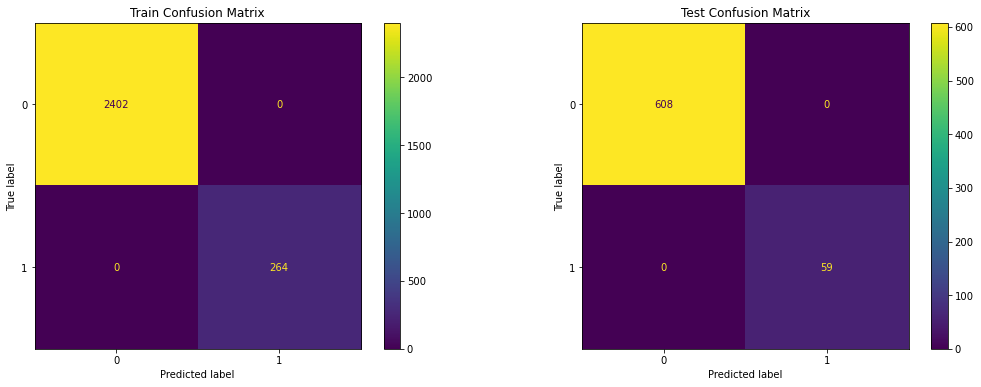

In [23]:
run_model(gnb, x_train, y_train, x_test, y_test)

Once again looking at the scores across the matrix board, we see great results amongst all categories. Seeing these indicate that the Naive Bayes Gaussian Model might be a good fit for our customer retention problem. This model does better with less training data (if the assumption of independent feature holds true), is quick to use and can easily predict multiple class prediction problem. 

However, it should be noted that there are a few catches when working with this type of model. This model assumes that all features are independent to each other, which is tad unrealistic when dealing with data collected from the real world. Also, this model is notoriously known for being an inadequate estimator so using the "predict_proba" feature can't be relied on.

# Nearest Neighbors Modeling

In [24]:
#using KNN for fifth model
knn =  KNeighborsClassifier()

Classification Report: Train Set 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2402
           1       0.68      0.07      0.13       264

    accuracy                           0.90      2666
   macro avg       0.79      0.53      0.54      2666
weighted avg       0.88      0.90      0.87      2666

Classification Report: Test Set 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       608
           1       0.17      0.02      0.03        59

    accuracy                           0.91       667
   macro avg       0.54      0.50      0.49       667
weighted avg       0.85      0.91      0.87       667



KNeighborsClassifier()

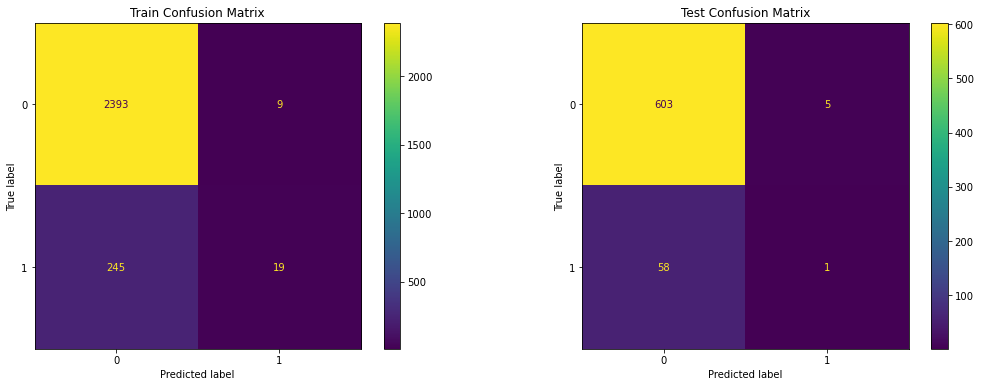

In [25]:
run_model(knn, x_train, y_train, x_test, y_test)

It seems the Nearest Neighbors Model (or the KNN for short) has finally broken the record for results. Here we can see in the confusion matrices that our model did not perform as well as the others did. 

With our train set data we can see that 2,393 of the customers that did not churn were correctly classified by the model to have stayed with SyriaTel but 9 were not. Also, for the consumers who did leave/churn, we see that 19 customers were correctly classified as ending their services with SyriaTel while that 245 customers were predicted to leave, didn't.

Meanwhile, within our test set data we see that 603 of the customers who stayed with SyriaTel were correctly classified by the model while 5 weren't. In addition, for 1 customer they were correctly classified as canceling while 58 people who were expected to do so, remained instead. 

What this means is that this model predicts more people deciding to break away from our company than they actually do. This can be a good thing in a way, as that our results for who will end up leaving will better than what we can expect. However, on the other side of the coin, some of those customers that we expect to stay, will instead leave. 

With the KNN model, the upsides of using it is that the model is straightforward, it doesn't make any assumptions with the data and with the more data it deals with, the more it learns and evolves on it's own. It also very simple to use for multi-class problems and can be used for both classification and regression problems. 

Just like the others, there are some disadvantages to using the Nearest Neighbors Model. For instance, it is true that the model will learn more as the data set grows, but with it are the potential for outlier sensitivity that may skew results as well as the difficulty of finding out which is the true optimal number of neighbors to use. Furthermore, as the data set gets bigger, not only does KNN not have the capability to deal with missing value points, but the speed and efficiency of the model declines. With this in mind, while Nearest Neighbors might be the right model to use from some datasets, it seems unlikely that it will be our final model. 


# Final Model Outcomes and Recommendations

In [26]:
#random forest with gridsearch
ranfor_grid = {'n_estimators': [150], 'max_depth':[15], 'criterion': ['gini', 'entropy'], 'class_weight': ['balanced', 'balanced_subsample']}

ranfor_search = GridSearchCV(RandomForestClassifier(), ranfor_grid, scoring='f1', verbose=0)

ranfor_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'], 'max_depth': [15],
                         'n_estimators': [150]},
             scoring='f1')

In [27]:
pd.DataFrame(ranfor_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.285950,0.018427,0.018445,0.001088,balanced,gini,15,150,"{'class_weight': 'balanced', 'criterion': 'gin...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.322477,0.015225,0.018911,0.000746,balanced,entropy,15,150,"{'class_weight': 'balanced', 'criterion': 'ent...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.401056,0.009298,0.018805,0.000762,balanced_subsample,gini,15,150,"{'class_weight': 'balanced_subsample', 'criter...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.422985,0.012772,0.018981,0.000638,balanced_subsample,entropy,15,150,"{'class_weight': 'balanced_subsample', 'criter...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [28]:
ranfor_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 15,
 'n_estimators': 150}

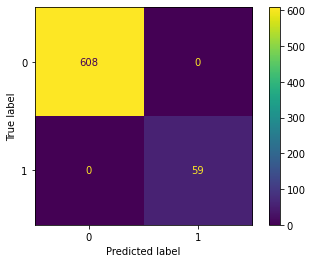

In [29]:
test_preds = ranfor_search.predict(x_test)
plot_confusion_matrix(ranfor_search, x_test, y_test)

In [30]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       608
           1       1.00      1.00      1.00        59

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667



The final model ended up being the Random Forest Classifier for a few reasons. Even though most of the models run above had good results, Random Forest not only had a high f1 score, but the results were reliable and quick. These models are known to run efficiently on large datasets, resistant with outliers and have a lower risk of over fitting to the data. 

Focusing on the f1 scores allowed us to have a harmonious balance between precision and recall. And since having high accuracy does not necessarily mean you'll have class equity results, f1 seemed to be the most reliable score to use. 

Our final model accurately predicted that 608 people who would stay with SyriaTel would stay and those 59 people who would churn, did so. Random Forest also has feature importances, which gave us insight as to which service should be the focus of improving at SyriaTel. With almost half the results for the feature importance being the International Plan followed by the Voicemail Plan, these should be the main focuses of enhancement for the company to prevent customer Churn. 

The only downside to Random Forest, as mentioned earlier, is that as the data set gets bigger it can over fit. However, with the best parameters feature, we were able to find that the most efficient class weight is balance, the criterion (a way to measure the quality of a split) was gini, with a max depth of trees being 15 and 150 estimators, our model should run smoothly.

With any model, there can always be improvement. Here, it would be recommended to have other models tested with more datasets (both past and future company data) as the multiple iterations on different aspects of customer data would provide a clearer picture as to why consumers are ending their services with SyriaTel.